# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import RepeatedKFold for cross-validation
from sklearn.model_selection import RepeatedKFold

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Pickle the best models for each dataset
import pickle

from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression

from pprint import pprint

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Imports for forward and backward selection
from sklearn.feature_selection import SequentialFeatureSelector

# Imports for PCA and PLS regression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the datasets
online_abusive_attacks = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_final.csv')

In [3]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [4]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

# Linear Modeling

In [5]:
# Get only the numeric features for each dataset
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)

In [6]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [7]:
for columns in [online_abusive_attacks_X_numeric.columns]:
  print(columns)

Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')


In [8]:
# Train test split for each dataset
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)

In [9]:
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=True)


In [10]:
online_abusive_attacks_lasso_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_ridge_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_elasticnet_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

## Online Abusive Attacks Stepwise Regression

In [11]:
online_abusive_attacks_model = LinearRegression()

online_abusive_attacks_forward = SequentialFeatureSelector(online_abusive_attacks_model, n_features_to_select=3, direction="forward")
online_abusive_attacks_backward = SequentialFeatureSelector(online_abusive_attacks_model, n_features_to_select=3, direction="backward")

In [12]:
online_abusive_attacks_forward.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3)

In [13]:
online_abusive_attacks_backward.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=3)

In [14]:
online_abusive_attacks_forward_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_forward.get_support()]
online_abusive_attacks_backward_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_backward.get_support()]

print("Forward Selection Features:", online_abusive_attacks_forward_features)
print("Backward Selection Features:", online_abusive_attacks_backward_features)

Forward Selection Features: Index(['high Profanity', 'high Threat', 'high other attr'], dtype='object')
Backward Selection Features: Index(['high Profanity', 'high Threat', 'high other attr'], dtype='object')


In [15]:
online_abusive_attacks_forward_linear_model = LinearRegression()
online_abusive_attacks_forward_linear_model.fit(online_abusive_attacks_X_train[online_abusive_attacks_forward_features], online_abusive_attacks_y_train)
online_abusive_attacks_forward_predictions = online_abusive_attacks_forward_linear_model.predict(online_abusive_attacks_X_test[online_abusive_attacks_forward_features])
online_abusive_attacks_forward_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_forward_predictions)
online_abusive_attacks_forward_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_forward_predictions)

print(f"Forward Selection RMSE (Online Abusive Attacks): {online_abusive_attacks_forward_rmse:.2f}")
print(f"Forward Selection R2 Score (Online Abusive Attacks): {online_abusive_attacks_forward_r2:.2f}")

Forward Selection RMSE (Online Abusive Attacks): 4.87
Forward Selection R2 Score (Online Abusive Attacks): 0.90


In [16]:
online_abusive_attacks_backward_linear_model = LinearRegression()
online_abusive_attacks_backward_linear_model.fit(online_abusive_attacks_X_train[online_abusive_attacks_backward_features], online_abusive_attacks_y_train)
online_abusive_attacks_backward_predictions = online_abusive_attacks_backward_linear_model.predict(online_abusive_attacks_X_test[online_abusive_attacks_backward_features])
online_abusive_attacks_backward_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_backward_predictions)
online_abusive_attacks_backward_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_backward_predictions)

print(f"Backward Selection RMSE (Online Abusive Attacks): {online_abusive_attacks_backward_rmse:.2f}")
print(f"Backward Selection R2 Score (Online Abusive Attacks): {online_abusive_attacks_backward_r2:.2f}")

Backward Selection RMSE (Online Abusive Attacks): 4.87
Backward Selection R2 Score (Online Abusive Attacks): 0.90


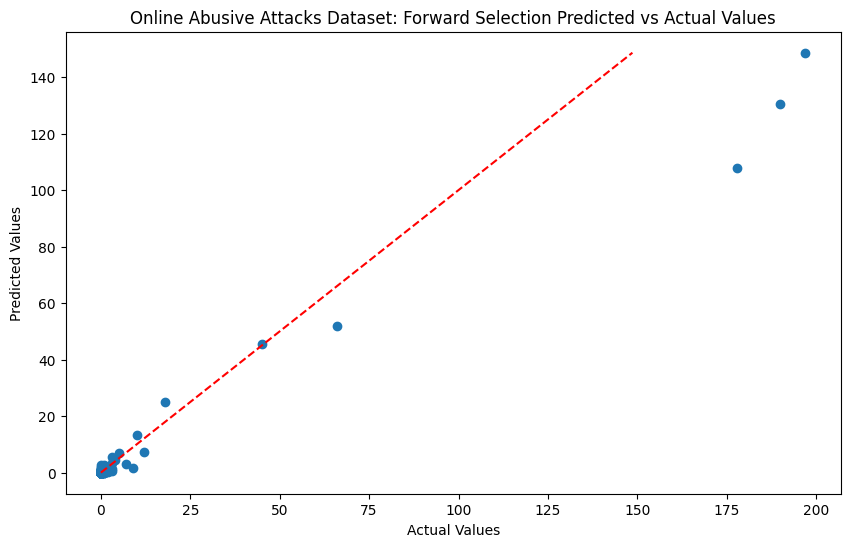

In [17]:
# Plot the predicted vs actual values for forward selection on the Online Abusive Attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_forward_predictions)
# Plot the linear regression line
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_forward_predictions)], [min(online_abusive_attacks_y_test), max(online_abusive_attacks_forward_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Online Abusive Attacks Dataset: Forward Selection Predicted vs Actual Values")
plt.show()

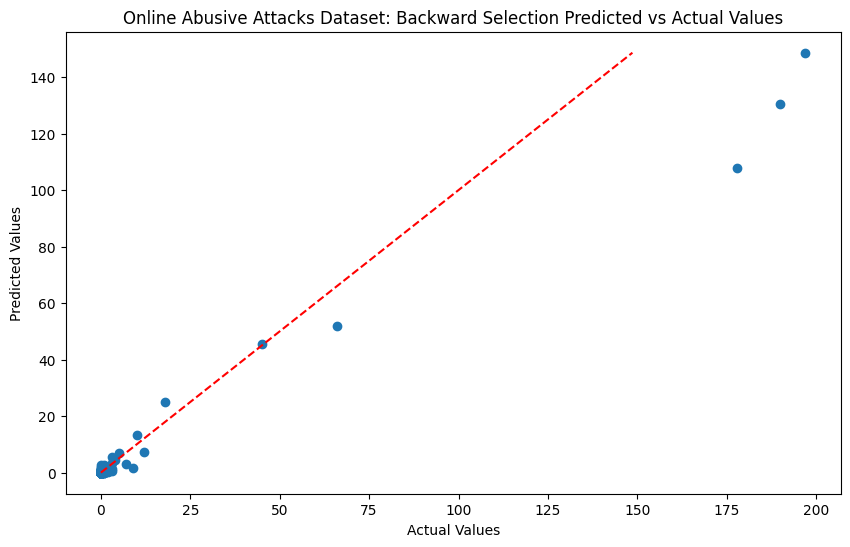

In [18]:
# Plot the predicted vs actual values for backward selection on the Online Abusive Attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_backward_predictions)
# Plot the linear regression line
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_backward_predictions)], [min(online_abusive_attacks_y_test), max(online_abusive_attacks_backward_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Online Abusive Attacks Dataset: Backward Selection Predicted vs Actual Values")
plt.show()

In [19]:
# Compare the RMSE values for forward and backward selection on the Online Abusive Attacks dataset
print(f"Forward Selection RMSE: {online_abusive_attacks_forward_rmse:.2f}")
print(f"Backward Selection RMSE: {online_abusive_attacks_backward_rmse:.2f}")

# Determine which model performed better (RMSE value)
if online_abusive_attacks_forward_rmse < online_abusive_attacks_backward_rmse:
    print(f"Forward Selection performed better on the Online Abusive Attacks dataset with an RMSE of {online_abusive_attacks_forward_rmse:.2f}.")
else:
    print(f"Backward Selection performed better on the Online Abusive Attacks dataset with an RMSE of {online_abusive_attacks_backward_rmse:.2f}.")
print()

# Compare the R2 values for forward and backward selection on the Online Abusive Attacks dataset
print(f"Forward Selection R2 Score: {online_abusive_attacks_forward_r2:.2f}")
print(f"Backward Selection R2 Score: {online_abusive_attacks_backward_r2:.2f}")

# Determine which model performed better (R2 value)
if online_abusive_attacks_forward_r2 > online_abusive_attacks_backward_r2:
    print(f"Forward Selection performed better on the Online Abusive Attacks dataset with an R2 score of {online_abusive_attacks_forward_r2:.2f}.")
else:
    print(f"Backward Selection performed better on the Online Abusive Attacks dataset with an R2 score of {online_abusive_attacks_backward_r2:.2f}.")

Forward Selection RMSE: 4.87
Backward Selection RMSE: 4.87
Backward Selection performed better on the Online Abusive Attacks dataset with an RMSE of 4.87.

Forward Selection R2 Score: 0.90
Backward Selection R2 Score: 0.90
Backward Selection performed better on the Online Abusive Attacks dataset with an R2 score of 0.90.


## Online Abusive Attacks PCR

In [20]:
online_abusive_attacks_pcr = make_pipeline(PCA(n_components=5), LinearRegression())
online_abusive_attacks_pcr.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)
online_abusive_attacks_pca = online_abusive_attacks_pcr.named_steps['pca']

In [21]:
online_abusive_attacks_pcr_predictions = online_abusive_attacks_pcr.predict(online_abusive_attacks_X_test)

In [22]:
online_abusive_attacks_pcr_explained_variance = np.sum(online_abusive_attacks_pca.explained_variance_ratio_)
online_abusive_attacks_pcr_explained_variance

np.float64(1.0)

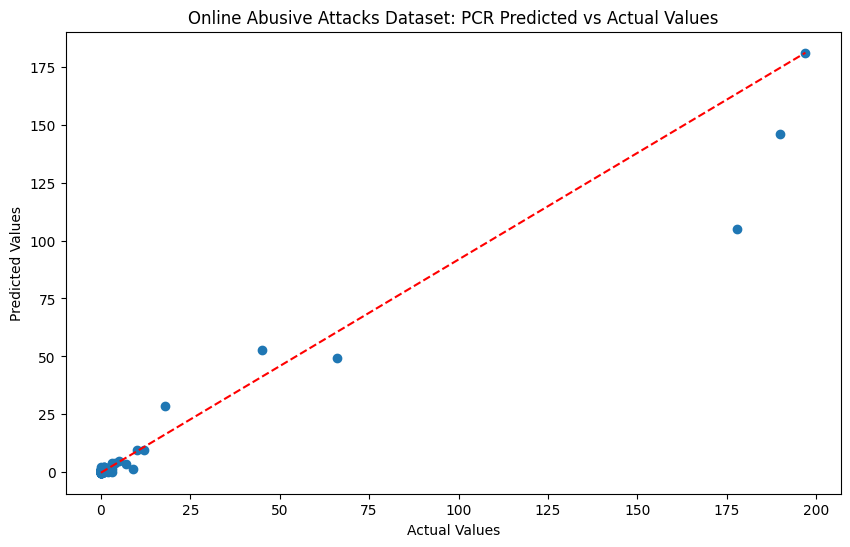

In [23]:
# Plot the predicted vs actual values for PCR on the Online Abusive Attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_pcr_predictions)
# Plot the linear regression line
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_y_test)], [min(online_abusive_attacks_pcr_predictions), max(online_abusive_attacks_pcr_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Online Abusive Attacks Dataset: PCR Predicted vs Actual Values")
plt.show()

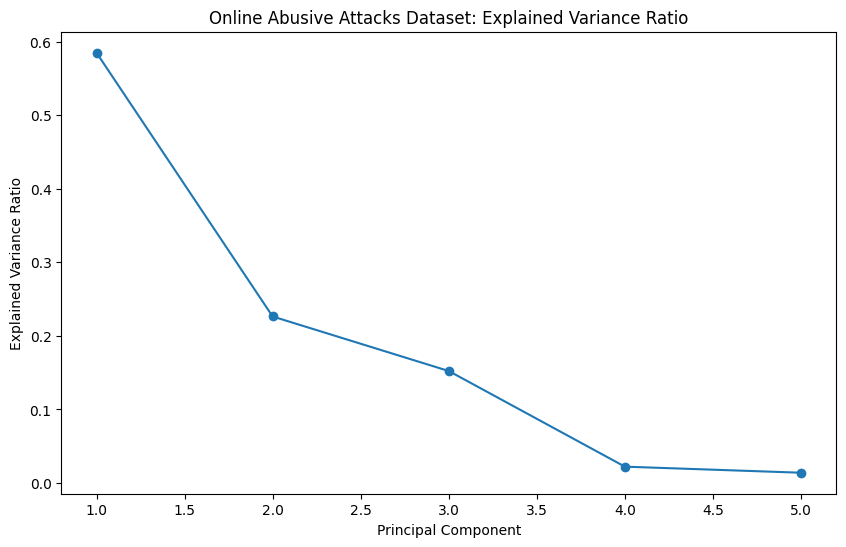

In [24]:
# Plot the explained variance ratio for PCR
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(online_abusive_attacks_pca.explained_variance_ratio_) + 1), online_abusive_attacks_pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Online Abusive Attacks Dataset: Explained Variance Ratio")
plt.show()

## Online Abusive Attacks PSLR

In [25]:
online_abusive_attacks_pls = PLSRegression(n_components=5)
online_abusive_attacks_pls.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

PLSRegression(n_components=5)

In [26]:
online_abusive_attacks_pls_predictions = online_abusive_attacks_pls.predict(online_abusive_attacks_X_test)

In [27]:
online_abusive_attacks_pls_explained_variance = online_abusive_attacks_pls.x_scores_.var(axis=0) / np.sum(online_abusive_attacks_pls.x_scores_.var(axis=0))
online_abusive_attacks_pls_explained_variance_ratio = np.sum(online_abusive_attacks_pls_explained_variance)
online_abusive_attacks_pls_explained_variance_ratio

np.float64(1.0)

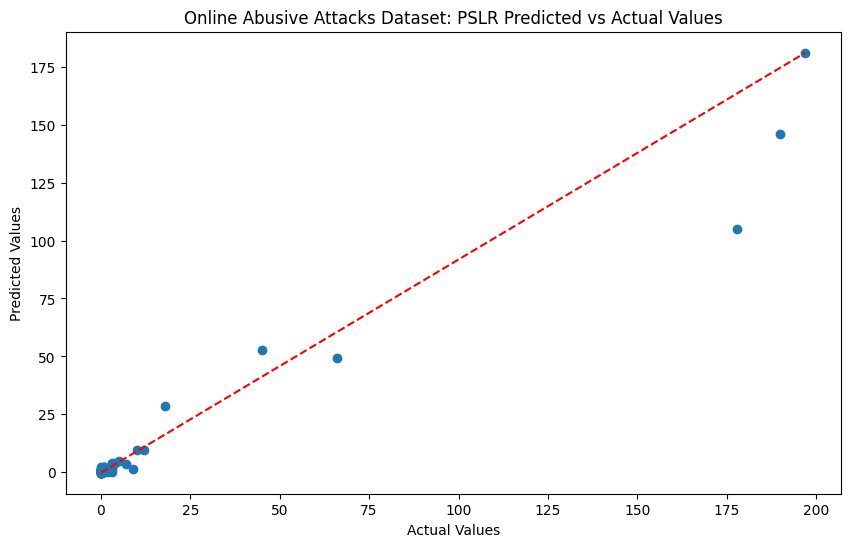

In [28]:
# Plot the predicted vs actual values for PSLR on the Online Abusive Attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_pls_predictions)
# Plot the linear regression line
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_y_test)], [min(online_abusive_attacks_pls_predictions), max(online_abusive_attacks_pls_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Online Abusive Attacks Dataset: PSLR Predicted vs Actual Values")
plt.show()

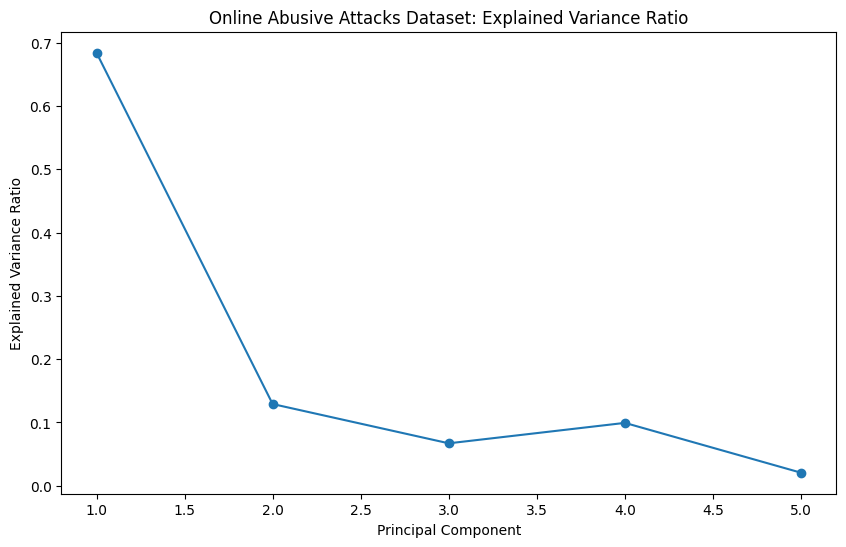

In [29]:
# Plot the explained variance ratio for PSLR
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(online_abusive_attacks_pls_explained_variance) + 1), online_abusive_attacks_pls.x_scores_.var(axis=0) / np.sum(online_abusive_attacks_pls.x_scores_.var(axis=0)), marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Online Abusive Attacks Dataset: Explained Variance Ratio")
plt.show()

## Online Abusive Attacks Principal Components Regression Conclusion

In [30]:
# Calculate RMSE for the Convabuse PCR predictions
online_abusive_attacks_pcr_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_pcr_predictions)
online_abusive_attacks_pcr_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_pcr_predictions)

# Calculate RMSE for the Convabuse PLS predictions
online_abusive_attacks_pls_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_pls_predictions)
online_abusive_attacks_pls_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_pls_predictions)

# Print RMSE values for PCR and PLS
print(f"Convabuse PCR RMSE: {online_abusive_attacks_pcr_rmse:.2f}")
print(f"Convabuse PCR R2 Score: {online_abusive_attacks_pcr_r2:.2f}")
print(f"Convabuse PLS RMSE: {online_abusive_attacks_pls_rmse:.2f}")
print(f"Convabuse PLS R2 Score: {online_abusive_attacks_pls_r2:.2f}")
print()

# Compare the RMSE values for PCR and PLS
if online_abusive_attacks_pcr_rmse < online_abusive_attacks_pls_rmse:
    print("The PCR model performed better on the Convabuse dataset with an RMSE of {:.2f}.".format(online_abusive_attacks_pcr_rmse))
else:
    print("The PLS model performed better on the Convabuse dataset with an RMSE of {:.2f}.".format(online_abusive_attacks_pls_rmse))

# Compare the R2 values for PCR and PLS
if online_abusive_attacks_pcr_r2 > online_abusive_attacks_pls_r2:
    print("The PCR model performed better on the Convabuse dataset with an R2 score of {:.2f}.".format(online_abusive_attacks_pcr_r2))
else:
    print("The PLS model performed better on the Convabuse dataset with an R2 score of {:.2f}.".format(online_abusive_attacks_pls_r2))

Convabuse PCR RMSE: 4.13
Convabuse PCR R2 Score: 0.93
Convabuse PLS RMSE: 4.13
Convabuse PLS R2 Score: 0.93

The PCR model performed better on the Convabuse dataset with an RMSE of 4.13.
The PCR model performed better on the Convabuse dataset with an R2 score of 0.93.


## Stepwise Regression Model Summary

In [31]:
# Create a feature regression model dictionary where each dataset maps to its RMSE and R2
stepwise_regression_model_summary_data = [
    {
        "Model": "Forward Selection",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_forward_rmse,
        "R2": online_abusive_attacks_forward_r2
    },
    {
        "Model": "Backward Selection",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_backward_rmse,
        "R2": online_abusive_attacks_backward_r2
    },
    {
        "Model": "Principal Components Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_pcr_rmse,
        "R2": online_abusive_attacks_pcr_r2
    },
    {
        "Model": "Principal Least Squares Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_pls_rmse,
        "R2": online_abusive_attacks_pls_r2
    }
]

# Convert to DataFrame (datasets become rows, metrics are columns)
stepwise_regression_model_summary = pd.DataFrame(stepwise_regression_model_summary_data)
stepwise_regression_model_summary

,Model,Dataset,RMSE,R2
0,Forward Selection,Online Abusive Attacks,4.869362,0.900313
1,Backward Selection,Online Abusive Attacks,4.869362,0.900313
2,Principal Components Regression,Online Abusive Attacks,4.129479,0.928306
3,Principal Least Squares Regression,Online Abusive Attacks,4.129479,0.928306


In [32]:
# Export the feature_regression_model_summary and the linear_regression_model_summary
stepwise_regression_model_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model3_stepwise-regression-summary.csv", index=False)